# Path Of Exile's Metagame Analysis
In this analysis I will study the case of parallels markets in a game and how the player can use it for making profit.

## Intro
### Description of the trading mechanic :
POE is a hack n slash RPG from GGG in which trading has a key part for progressing in the game.

In POE you can trade your currencies for stuff or other currencies, within the game with NPCs or outside the game with other players.

To trade with others you get to use an external website where every order is shown to everyone, like 'POE.trade'.

In addition, some websites can show you the evolution of prices across 120 days, due to some regulation of the POE API.
But in contrast with almost every other multiplayer-online games there is no fee to trade with other players or with NPCs.
The regulation comes from the rule of supply and demands of the players, except for a few examples.

The player can transform currencies in-game only in this order :

wisdom -> portal -> transmutation -> augmentation -> alteration -> jeweller -> fusing -> chance -> scouring -> regret -> alchemy

with some arbitrary conversion rate for each conversion.

### Problematic :
During my playtime a question came across my head :
Is there any benefits to hybrid trading ?

We'll try to find out if using hybrid market and conversions can help the player to generate profit.

### Methodology :
For the collecting and cleaning of the data I used Google spreadsheet.
Then for the visualisation and analysis I used Python (Pandas).


In [45]:
#Import of libraries
import numpy as np
import pandas as pd 
%matplotlib inline

## A-Patterns

### First Case : Softcore trading patterns analysis

The first analysis should determine if there is any profit available to the player buying currencies on the external market, then transform them in the in-game market and finally selling them back in the external market.

I used both market prices to set up transfer conditions. There is no exchange fee.
I set up my data in order to find where skipping the external market, and where getting back at it may be beneficial for the player.
Spreadsheet was used during this experimental phase.

In [46]:
#First dataset : Softcore POE Trade
softcore_trade = pd.read_csv('softcore_trade.csv')

In [47]:
#Dataset 1
softcore_trade

,Unnamed: 0,In-game change from to another,Chaos POE.trade price,Trade game to market,Benefit
0,Wisdom,1.00,0.0100,NaN,NaN
1,Portal,0.33,0.0400,0.013333,0.003333
2,Transmutation,0.14,0.0500,0.007143,-0.032857
3,Augmentation,0.25,0.1000,0.025000,-0.025000
4,Altération,0.25,0.3521,0.088025,-0.011975
5,Jeweller,0.50,0.1333,0.066650,-0.285450
6,Fusing,0.25,0.5800,0.145000,0.011700
7,Chance,1.00,0.0714,0.071400,-0.508600
8,Scouring,0.25,0.3930,0.098250,0.026850
9,Regret,0.50,0.3571,0.178550,-0.214450


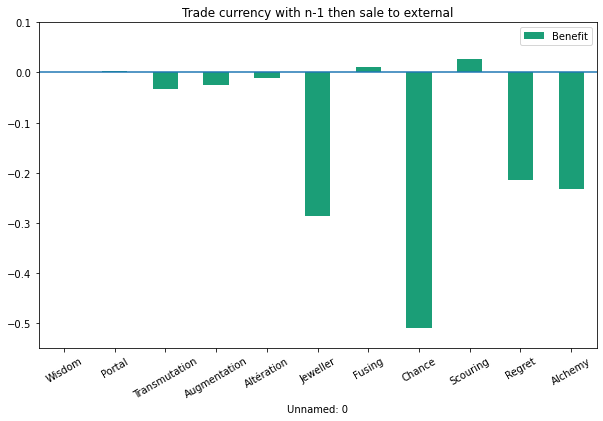

In [75]:
#plotting the benefits
ax = softcore_trade.plot(ylim=(-0.55,0.1),kind='bar', x='Currency', y='Benefit',title = 'Trade currency with n-1 then sale to external', figsize = (10,6), cmap='Dark2', rot = 30)
ax.axhline(y=0)

The graph shows us that there is profit for the following conversions :
* wisdom to portal
* jeweller to fusing
* chance to scouring

Moreover, this first analysis will help me later to identify which trade I have to focus on.

### Quick Analysis for hardcore playerbase
Following the same steps for hardcore playerbase we get :

In [49]:
#Second dataset : hardcore POE Trade
hardcore_trade = pd.read_csv('hardcore_trade.csv')
hardcore_trade

,Unnamed: 0,In-game conversion,Chaos value external,Sale,Benefits
0,Portal,0.333333,0.0133,0.004433,0.000000
1,Transmutation,0.142857,0.0250,0.003571,-0.009729
2,Augmentation,0.250000,0.0250,0.006250,-0.018750
3,Altération,0.250000,0.8330,0.208250,0.183250
4,Jeweller,0.500000,0.6250,0.312500,-0.520500
5,Fusing,0.250000,0.2857,0.071425,-0.553575
6,Chance,1.000000,0.0083,0.008300,-0.277400
7,Scouring,0.250000,0.2860,0.071500,0.063200
8,Regret,0.500000,0.1538,0.076900,-0.209100
9,Alchemy,0.500000,0.3330,0.166500,0.012700


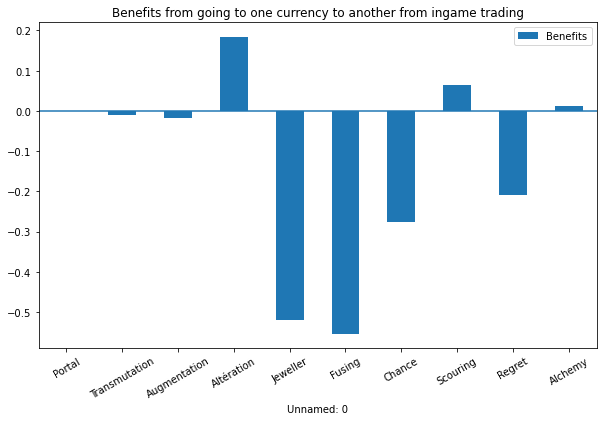

In [67]:
#plotting the benefits
ax2 = hardcore_trade.plot(kind='bar', x='Currency',y='Benefits',title = 'Benefits from going to one currency to another from in-game trading', figsize = (10,6), rot = 30)
ax2.axhline(y=0)

Without going into details, less trade offers are available, for example
there is no trade wisdom -> portal.

Trends are different, we can explain it by a different need of the public using this market. Here they use the best currencies for crafting items.

The other ones are missing, because the players thoroughly scan the market.

### Comparison between the two markets :

* Both markets have three positive conversion ingame. 
* The best conversion for the softcore model is converting scouring to chance with 2% benefits.
* The best conversion for the hardcore model is converting alteration to jeweller with 18% benefits
* But only the hardcore market is able to make more than 10% percent on a currency. Which is important for this kind of market with no regulations.

## B-Focus
### Focus on the conversion Jeweller to Fusing in the softcore model market

I will try in this part to analyze the complete cycle of purchase to sale for the Jeweller-Fusing trade in the softcore market.

In [51]:
#import of the dataset
detail_trade_soft = pd.read_csv('Detail_jeweller_fusing.csv')
detail_trade_soft.head()

,Purchase price(pour une chaos nbre de jeweller,Benefit (0.50 sale price),Benefit (0.55sale price),Benefit (0.6 sale price)
0,4.6,-0.43,-0.37,-0.31
1,4.7,-0.41,-0.35,-0.30
2,4.8,-0.40,-0.34,-0.28
3,4.9,-0.39,-0.33,-0.27
4,5.0,-0.38,-0.31,-0.25


This dataset was obtained with google spreadsheet. I will reproduce it using Pandas.

In [52]:
#initializing the range for purchases
purchase_number = np.linspace(4.5, 9, 100)
purchase_number

array([4.5       , 4.54545455, 4.59090909, 4.63636364, 4.68181818,
       4.72727273, 4.77272727, 4.81818182, 4.86363636, 4.90909091,
       4.95454545, 5.        , 5.04545455, 5.09090909, 5.13636364,
       5.18181818, 5.22727273, 5.27272727, 5.31818182, 5.36363636,
       5.40909091, 5.45454545, 5.5       , 5.54545455, 5.59090909,
       5.63636364, 5.68181818, 5.72727273, 5.77272727, 5.81818182,
       5.86363636, 5.90909091, 5.95454545, 6.        , 6.04545455,
       6.09090909, 6.13636364, 6.18181818, 6.22727273, 6.27272727,
       6.31818182, 6.36363636, 6.40909091, 6.45454545, 6.5       ,
       6.54545455, 6.59090909, 6.63636364, 6.68181818, 6.72727273,
       6.77272727, 6.81818182, 6.86363636, 6.90909091, 6.95454545,
       7.        , 7.04545455, 7.09090909, 7.13636364, 7.18181818,
       7.22727273, 7.27272727, 7.31818182, 7.36363636, 7.40909091,
       7.45454545, 7.5       , 7.54545455, 7.59090909, 7.63636364,
       7.68181818, 7.72727273, 7.77272727, 7.81818182, 7.86363

I get the formula for benefit :
Benefit = (purchase_number / conversion_rate * sale_price) - purchase_price

In this case :
Benefit = (purchase_number / 4 * sale_price) - 1

I'll take three different scenarios : sale_price = 0.5, 0.55, 0.6

In [58]:
#
Benef1 = list(map(lambda x: x/4*0.5-1, purchase_number))
Benef2 = list(map(lambda x: x/4*0.55-1, purchase_number))
Benef3 = list(map(lambda x: x/4*0.6-1, purchase_number))

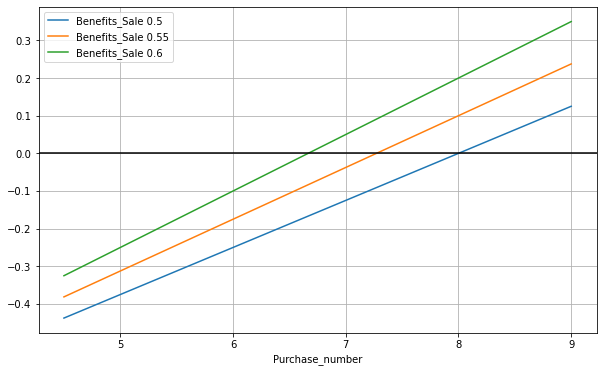

In [74]:
data = {'Purchase_number' : purchase_number, 'Benefits_Sale 0.5' : Benef1,'Benefits_Sale 0.55': Benef2,'Benefits_Sale 0.6' : Benef3 }
df = pd.DataFrame(data)
figure = df.plot(x='Purchase_number', figsize = (10,6))
figure.axhline(y=0,color='k')
figure.grid()

Here I get in the details for the Trade Jeweller-Fusing, still using chaos orb as metric currency.
As everyone does in this game, it's kind of like the euro or the dollar for the POE market.

The graph above resumes the different scenarios. For different purchase prices of jeweller in chaos,
and different sales prices of fusing in chaos.

I took these three scenarios because they represent high, medium and low sales prices.
Between 5 or 8 Jewellers for 1 chaos I have the all-time prices market for the purchases.

# Conclusion
I was able to determine that the hybrid market can be beneficial for the player, in both softcore and hardcore mode. Plus I found out the best practices for the conversion chaos-jeweller-fusing-chaos to determine if there will be profits or not for the player.